### Librerias Usadas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.optimize import minimize

### Función de Rastrigin

In [6]:
def rastrigin_2d(x):
    """
    Función de Rastrigin en 2 dimensiones.
    Parámetros:
        x: array-like de tamaño 2 [x1, x2].
    Retorna:
        Valor de la función.
    """
    x1, x2 = x
    return 10 * 2 + (x1**2 - 10 * np.cos(2 * np.pi * x1)) + (x2**2 - 10 * np.cos(2 * np.pi * x2))

### Gradiente de la Función de Rastrigin 2D

In [8]:
def rastrigin_2d_grad(x):
    x1, x2 = x
    grad_x1 = 2 * x1 + 10 * np.pi * np.sin(2 * np.pi * x1)
    grad_x2 = 2 * x2 + 10 * np.pi * np.sin(2 * np.pi * x2)
    return np.array([grad_x1, grad_x2])

### Descenso por Gradiente para la Función de Rastrigin 2D

In [4]:
def gradient_descent_2d(func, grad_func, x0, lr=0.01, max_iter=1000):
    path = [x0]
    x = x0
    for _ in range(max_iter):
        grad = grad_func(x)
        x = x - lr * grad
        path.append(x)
    return np.array(path)

### Visualización del descenso por Gradiente

Animación guardada correctamente.


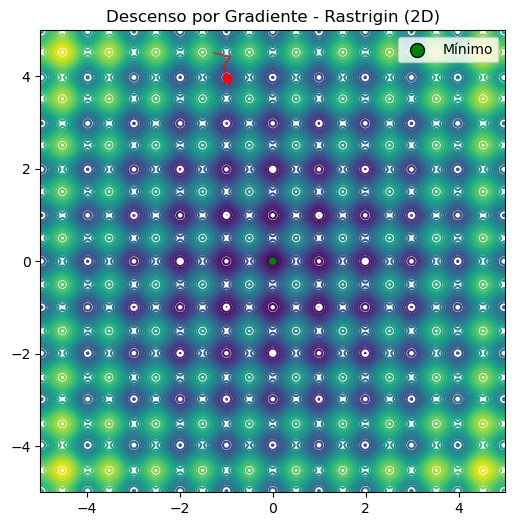

In [25]:
def animate_rastrigin_2d_with_min(path, min_point):
    fig, ax = plt.subplots(figsize=(6, 6))
    x = np.linspace(-5, 5, 400)
    y = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x, y)
    Z = rastrigin_2d([X, Y])

    ax.contour(X, Y, Z, levels=50, cmap='viridis')
    path_x, path_y = path[:, 0], path[:, 1]
    point, = ax.plot([], [], 'ro')
    line, = ax.plot([], [], 'r-', alpha=0.6)

    # Mínimo
    ax.scatter(*min_point, c='green', s=100, label='Mínimo', edgecolor='black')
    ax.legend()

    def init():
        point.set_data([], [])
        line.set_data([], [])
        return point, line

    def update(frame):
        step = max(1, len(path) // 50)
        index = frame * step if frame * step < len(path) else len(path) - 1
        point.set_data([path_x[index]], [path_y[index]])
        line.set_data(path_x[:index + 1], path_y[:index + 1])
        return point, line

    total_frames = min(200, len(path))
    ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=100)
    ax.set_title("Descenso por Gradiente - Rastrigin (2D)")
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    return ani

np.random.seed(42)
x0 = np.random.uniform(-5, 5, 2)
min_point = np.array([0, 0])  # Mínimo conocido en 2D

# Generar trayectoria
path_rastrigin_2d = gradient_descent_2d(
    rastrigin_2d, rastrigin_2d_grad, x0, lr=0.01, max_iter=1000000
)

# Generar y guardar animación
ani_2d = animate_rastrigin_2d_with_min(path_rastrigin_2d, min_point)
try:
    ani_2d.save("rastrigin_2d_with_min.gif", writer="pillow", fps=1)
    print("Animación guardada correctamente.")
except Exception as e:
    print(f"Error al guardar la animación: {e}")

### Rastrigin 3D

In [26]:
def rastrigin_3d(x):
    """
    Función de Rastrigin en 3 dimensiones.
    Parámetros:
        x: array-like de tamaño 3 [x1, x2, x3].
    Retorna:
        Valor de la función.
    """
    x1, x2, x3 = x
    return (
        10 * 3 +
        (x1**2 - 10 * np.cos(2 * np.pi * x1)) +
        (x2**2 - 10 * np.cos(2 * np.pi * x2)) +
        (x3**2 - 10 * np.cos(2 * np.pi * x3))
    )

### Gradiente de la Función de Rastrigin 3D

In [27]:
def rastrigin_3d_grad(x):
    x1, x2, x3 = x
    grad_x1 = 2 * x1 + 10 * np.pi * np.sin(2 * np.pi * x1)
    grad_x2 = 2 * x2 + 10 * np.pi * np.sin(2 * np.pi * x2)
    grad_x3 = 2 * x3 + 10 * np.pi * np.sin(2 * np.pi * x3)
    return np.array([grad_x1, grad_x2, grad_x3])

### Descenso por Gradiente para la Función de Rastrigin 3D

In [28]:
def gradient_descent_3d(func, grad_func, x0, lr=0.01, max_iter=1000):
    path = [x0]
    x = x0
    for _ in range(max_iter):
        grad = grad_func(x)
        x = x - lr * grad
        path.append(x)
    return np.array(path)

### Visualización del descenso por Gradiente de la función de Rastrigin 3D

In [ ]:
def animate_rastrigin_3d_with_min(path, min_point):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Ajustando el ángulo de visión
    ax.view_init(elev=30, azim=45)  # Puedes ajustar estos valores

    # Superficie de la función de Rastrigin
    x1 = np.linspace(-5, 5, 100)
    x2 = np.linspace(-5, 5, 100)
    X1, X2 = np.meshgrid(x1, x2)
    X3 = np.ones_like(X1) * min_point[2]  # Mantener x3 constante
    Z = rastrigin_3d([X1, X2, X3])

    # Superficie de la función con transparencia
    ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.1)

    # Trayectoria
    path_x1, path_x2, path_x3 = path[:, 0], path[:, 1], path[:, 2]
    path_z = rastrigin_3d([path_x1, path_x2, path_x3])
    line, = ax.plot([], [], [], 'r-', lw=2)
    point, = ax.plot([], [], [], 'ro')

    # Mínimo
    min_z = rastrigin_3d(min_point)
    ax.scatter(min_point[0], min_point[1], min_z, c='green', s=100, label='Mínimo', edgecolor='black')
    ax.legend()

    # Ajustar los límites de los ejes para mejor visualización
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(np.min(Z), np.max(Z))

    def init():
        line.set_data([], [])
        line.set_3d_properties([])
        point.set_data([], [])
        point.set_3d_properties([])
        return line, point

    def update(frame):
        step = max(1, len(path) // 50)
        index = frame * step if frame * step < len(path) else len(path) - 1
        line.set_data(path_x1[:index + 1], path_x2[:index + 1])
        line.set_3d_properties(path_z[:index + 1])
        point.set_data([path_x1[index]], [path_x2[index]])
        point.set_3d_properties(path_z[index])
        return line, point

    total_frames = min(200, len(path))
    ani = FuncAnimation(fig, update, frames=total_frames, init_func=init, blit=True, interval=100)
    return ani

np.random.seed(42)
x0 = np.random.uniform(-5, 5, 3)
min_point = np.array([0, 0, 0])  # Mínimo conocido en 3D

# Generar trayectoria
path_rastrigin_3d = gradient_descent_3d(
    rastrigin_3d, rastrigin_3d_grad, x0, lr=0.01, max_iter=100000
)

# Generar y guardar animación
ani_3d = animate_rastrigin_3d_with_min(path_rastrigin_3d, min_point)

try: 
    ani_3d.save("rastrigin_3d_with_min.gif", writer="pillow", fps=1)
    print("Animación guardada correctamente.")
except Exception as e:
    print(f"Error al guardar la animación: {e}")